In [1]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
# plt.rcParams['axes.grid'] = True
sns.set()

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

In [3]:
# Сигнал равен номеру итерации. Параметры для генератора включают: ar1, ma1 - коэффициенты для ARIMA(1, 0, 1);
series_type = "arima"

# Cоздание синтезатора, cпособного создавать workers_num наборов параметров, для каждого из которых генерировать временные ряды.
synt = Synthesizer(series_type, dim=50, low=-10, high=10, 
                   noise_var=1, workers_num=2, random_seed=3)

# Создание генератора данных, склеивающего разнородные временные ряды в один 
# В данном случае источник рядов - наш синтезатор
gen = Generator(series_type, synt)

# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(pieces_num=20, lower_bound=100, upper_bound=200, alternating=False)

In [4]:
# gen.show_time_series()

In [5]:
# gen.draw_merged()g

In [6]:
gen.launch()

# Cоздание объекта GMMP алгоритма, работающего total_time итераций, добавляющего экспертов с периодичностью period
# Каждый эксперт представляет из себя LinReg модель, которая при инициализации тренируется на последних train_window точках
algo = Algorithm(series_type, gen, total_time=gen.total_time, train_window=40, a=gen.responses.min(), b=gen.responses.max())

# Запуск алгоритма
algo.run()

100%|██████████████████████████████████████████████████████████████████████| 3053/3053 [00:02<00:00, 1121.60it/s]


In [9]:
algo.models_idxs[1], algo.models_idxs[70], algo.models_idxs[3]

(1, 0, 1)

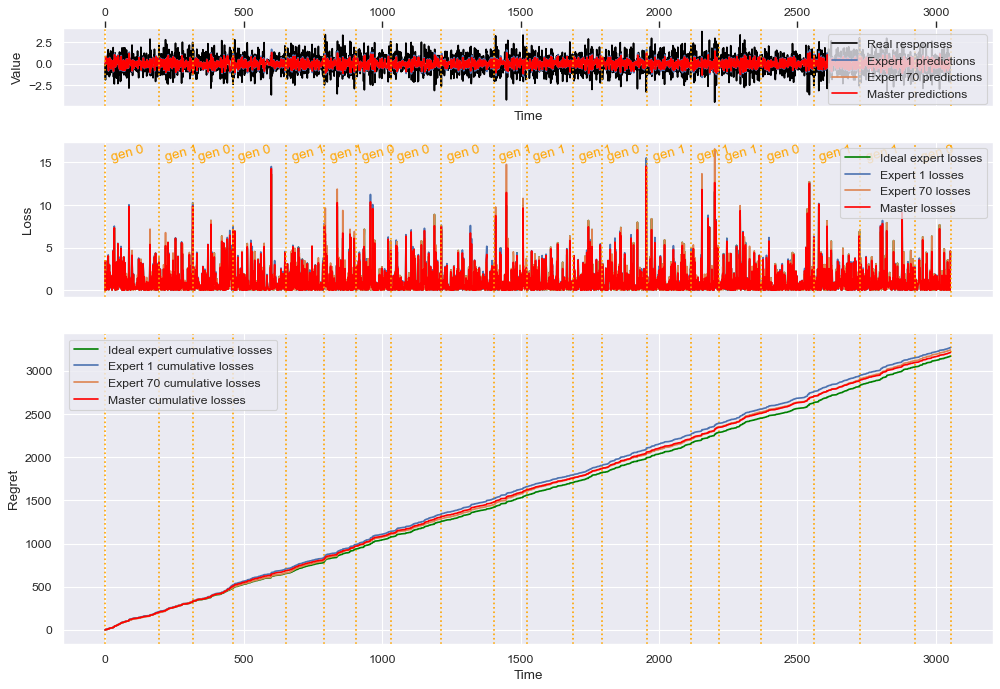

In [15]:
fig, ax = algo.draw_all(show=["ideal", "master"], show_experts=[1, 70])

In [11]:
loss_f = lambda x, y: np.square(x - y)

In [12]:
# for i, b in enumerate(algo.best_combo):
#     print(f"Best {i+1} segment losses got {b} expert: ", algo.segment_losses[i, b])

In [13]:
# [(seg_num+1, left, right) for seg_num, left, right in zip(
#                                     np.arange(algo.generator.pieces_num),
#                                     algo.generator.stamps,
#                                     algo.generator.stamps[1:])]